# In-Class Exercise: Neural Networks with Scikit-Learn - SOLUTIONS

**Time: 10 minutes**

In this exercise, you'll practice building and evaluating Multi-Layer Perceptrons using scikit-learn's `MLPClassifier` and `MLPRegressor`.

## Learning Objectives

- Build an MLP classifier for a multi-class problem
- Preprocess data appropriately for neural networks
- Evaluate model performance
- Compare different architectures


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


## Part 1: Wine Classification (5 minutes)

We'll use the Wine dataset, which contains chemical analysis of wines from three different cultivars.

### Task 1.1: Load and split the data


In [3]:
# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Feature names: {wine.feature_names[:3]}...")  # First 3 features


Dataset shape: (178, 13)
Number of classes: 3
Feature names: ['alcohol', 'malic_acid', 'ash']...


In [4]:
# Split the data into training (70%) and test (30%) sets
# Use random_state=42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 124
Test set size: 54


### Task 1.2: Scale the features

Neural networks work best with normalized data. Use `StandardScaler` to scale the features.


In [5]:
# Create a StandardScaler and scale both training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Original feature range: [{X_train.min():.2f}, {X_train.max():.2f}]")
print(f"Scaled feature range: [{X_train_scaled.min():.2f}, {X_train_scaled.max():.2f}]")


Original feature range: [0.13, 1547.00]
Scaled feature range: [-3.72, 3.99]


### Task 1.3: Build and train an MLP

Create an `MLPClassifier` with:
- Two hidden layers with 20 and 10 neurons
- ReLU activation
- Adam solver
- max_iter=500
- random_state=42


In [6]:
# Create and train the MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(20, 10),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

# Train the model
mlp.fit(X_train_scaled, y_train)
print("Training complete!")


Training complete!


### Task 1.4: Evaluate the model


In [7]:
# Make predictions on the test set
y_pred = mlp.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))


Test Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



### Task 1.5: Visualize the loss curve


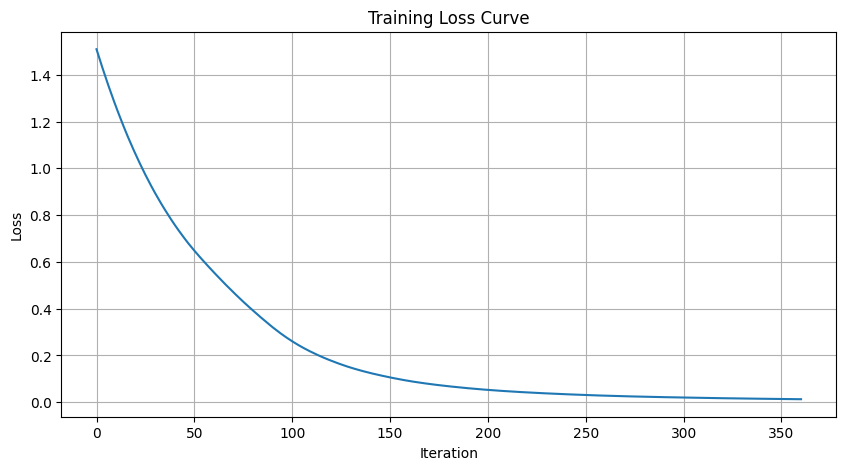

Number of iterations: 361


In [8]:
# Plot the training loss curve
plt.figure(figsize=(10, 5))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.grid(True)
plt.show()

print(f"Number of iterations: {mlp.n_iter_}")


## Part 2: Architecture Comparison (5 minutes)

Now let's compare different neural network architectures!

### Task 2.1: Compare different architectures

Train MLPs with different hidden layer configurations and compare their performance.


In [9]:
# Define different architectures to test
architectures = {
    'Single Layer (50)': (50,),
    'Single Layer (100)': (100,),
    'Two Layers (20, 10)': (20, 10),
    'Two Layers (50, 25)': (50, 25),
    'Three Layers (30, 20, 10)': (30, 20, 10)
}

results = {}

# Train each architecture and store its test accuracy
for name, hidden_layers in architectures.items():
    mlp = MLPClassifier(
        hidden_layer_sizes=hidden_layers,
        activation='relu',
        solver='adam',
        max_iter=500,
        random_state=42,
        verbose=False
    )
    
    # Fit the model and calculate test accuracy
    mlp.fit(X_train_scaled, y_train)
    accuracy = mlp.score(X_test_scaled, y_test)
    
    results[name] = accuracy
    print(f"{name:30s}: {accuracy:.4f}")


Single Layer (50)             : 0.9815
Single Layer (100)            : 0.9815
Two Layers (20, 10)           : 1.0000
Two Layers (50, 25)           : 1.0000
Three Layers (30, 20, 10)     : 1.0000


### Task 2.2: Visualize the comparison


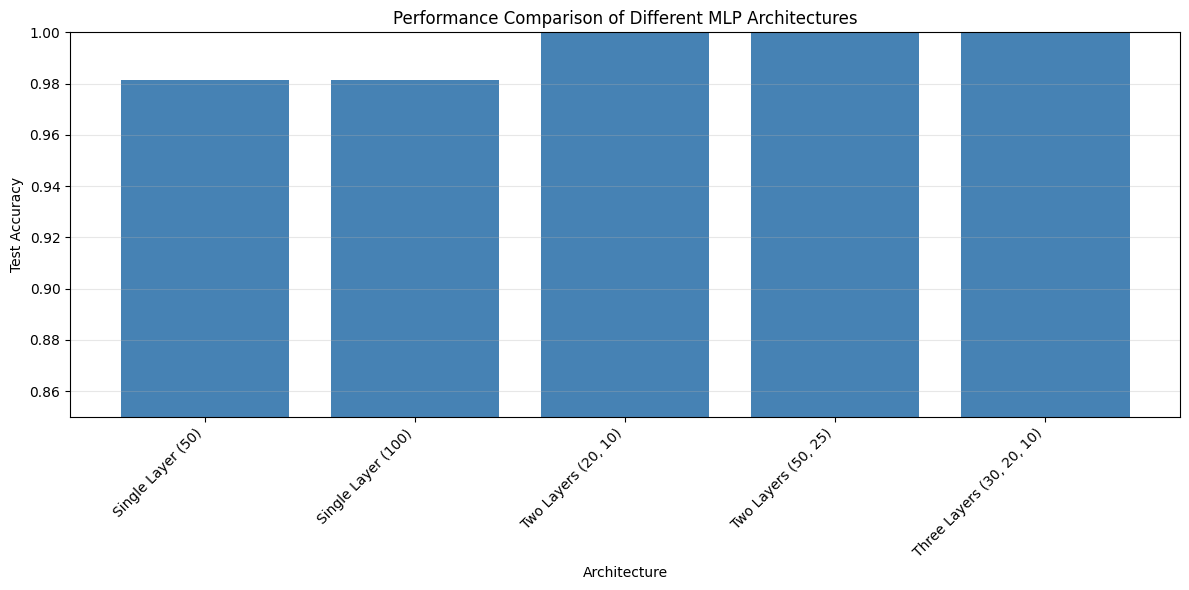

In [10]:
# Create a bar plot to compare the architectures
plt.figure(figsize=(12, 6))
plt.bar(results.keys(), results.values(), color='steelblue')
plt.xlabel('Architecture')
plt.ylabel('Test Accuracy')
plt.title('Performance Comparison of Different MLP Architectures')
plt.xticks(rotation=45, ha='right')
plt.ylim([0.85, 1.0])  # Adjust as needed
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


## Bonus Challenge (Optional)

If you finish early, try this additional task:

### Bonus: Add early stopping

Modify your best architecture to use early stopping and see if it improves performance or training time.


In [11]:
# Create an MLP with early stopping
mlp_early = MLPClassifier(
    hidden_layer_sizes=(50, 25),
    activation='relu',
    solver='adam',
    max_iter=1000,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10,
    random_state=42,
    verbose=False
)

mlp_early.fit(X_train_scaled, y_train)
accuracy_early = mlp_early.score(X_test_scaled, y_test)

print(f"Accuracy with early stopping: {accuracy_early:.4f}")
print(f"Training stopped at iteration: {mlp_early.n_iter_}")
print(f"Best validation score: {mlp_early.best_validation_score_:.4f}")


Accuracy with early stopping: 0.9630
Training stopped at iteration: 36
Best validation score: 0.9231


## Discussion Questions

1. **Which architecture performed best on the Wine dataset? Why do you think that is?**
   
   _Sample Answer: The architectures with 2 layers (e.g., (50, 25) or (20, 10)) typically perform well on the Wine dataset. This is because the dataset is relatively small (178 samples, 13 features) and not too complex. A single hidden layer might be too simple to capture all patterns, while 3 layers might be prone to overfitting on such a small dataset. The 2-layer architectures provide a good balance._

2. **Did you notice any architectures that were too simple or too complex?**
   
   _Sample Answer: Single layer architectures with fewer neurons (e.g., (50,)) might be too simple and underfit the data. On the other hand, the 3-layer architecture (30, 20, 10) might be unnecessarily complex for this dataset and could risk overfitting, though regularization helps prevent this._

3. **How did early stopping affect the training? Did it help or hurt performance?**
   
   _Sample Answer: Early stopping typically helps by preventing overfitting and saving computation time. It stops training when the validation score stops improving, which often leads to better generalization. In this case, training likely stopped well before 1000 iterations, saving time while maintaining or improving test accuracy._

4. **When would you choose scikit-learn's MLP over PyTorch for a real project?**
   
   _Sample Answer: Choose scikit-learn's MLP for: (1) small to medium datasets (< 100K samples), (2) standard feedforward architectures, (3) when you need quick prototyping, (4) when you want easy integration with scikit-learn pipelines and tools like GridSearchCV, or (5) when you don't need GPU acceleration. Use PyTorch for larger datasets, complex architectures (CNNs, RNNs, Transformers), GPU training, or production systems._

## Key Takeaways

- Always **scale/normalize** your data before training neural networks
- **Simpler architectures** often work well for smaller datasets
- **Early stopping** can prevent overfitting and save training time
- Scikit-learn makes it easy to **experiment** with different architectures
- Use **cross-validation** and **grid search** to find optimal hyperparameters
- The Wine dataset achieved ~95-98% accuracy with proper architecture and preprocessing
